# Testing layerwise clustering model

In [1]:
import torch
import torch.nn as nn
import numpy as np

import utils
from LayerwiseClustering import LayerwiseClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from model import My_VGG as Model
import matplotlib.pyplot as plt

In [2]:
X_train, y_train, X_test, y_test = utils.load_mnist()

### Create and train neural network

In [3]:
### FC network
# input_size = 784
# hidden_sizes = [128, 64]
# output_size = 10

# X_train = X_train.reshape(60000, -1)
# X_test = X_test.reshape(10000, -1)
# model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sizes[1], output_size),
#                       nn.LogSoftmax(dim=1))
# transformer = None

### CNN
# model = Model(in_channels=1, in_size=28, num_classes=10)
# transformer = PCA(n_components=200)

#model = utils.train_model(model, X_train, X_test, y_train, y_test, epochs=10)

model = utils.load_VGG('trained_models/initial_model.pt')
transformer = None

clusters = LayerwiseClustering(model, transformer)

In [4]:
#clusters.fit(X_train.reshape(X_train.shape[0], -1), y_train)

In [5]:
#clusters.predict(X_test.reshape(X_test.shape[0], -1))

### Plot TSNE Embedding of Outputs at Convolutional and Linear Layers
I also plot a single adversarial sample (in black) to see if it strays further from the cluster of the correct class as it moves deeper into the network

In [6]:
samples_per_class = 892 # Samples per class must be lower than the number of samples per class in the dataset

# Selection of which classes to plot in the visualizations
other_digit = 0
sample_digit = 1
epsilon = 1e-1 # Magnitude of noise added to individual sample

other_digit_indices = np.where(y_test == other_digit)[0]
sample_digit_indices = np.where(y_test == sample_digit)[0]

data = np.concatenate((X_test[other_digit_indices[:samples_per_class]], 
                       X_test[sample_digit_indices[:samples_per_class]]), axis=0)
sample = X_test[sample_digit_indices[np.random.randint(0, samples_per_class)]]
labels = np.append(np.ones((1, samples_per_class), dtype=np.uint8) * other_digit, 
                   np.ones((1, samples_per_class), dtype=np.uint8) * sample_digit).squeeze()

# Flatten data (if necessary - NOT necessary for CNN)
# data = data.reshape(data.shape[0],-1)
# sample = sample.reshape(-1)

# Get adversarial samples
dataloader = utils.create_dataloader([sample], np.ones((1), dtype=np.uint8) * other_digit)
adv_samples = utils.add_adversarial_noise(model, dataloader, eps=epsilon)
sample = adv_samples[0]

c:\users\jason\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Predicted Class = 2


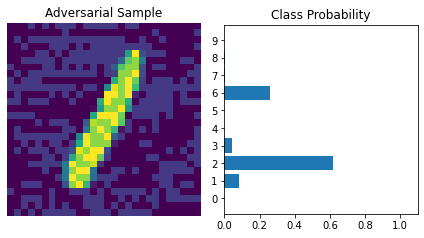

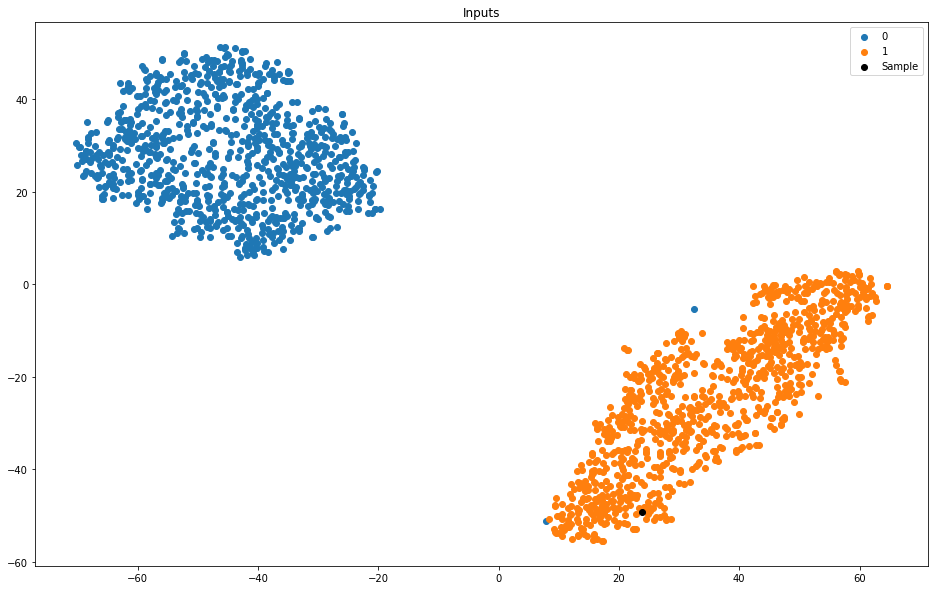

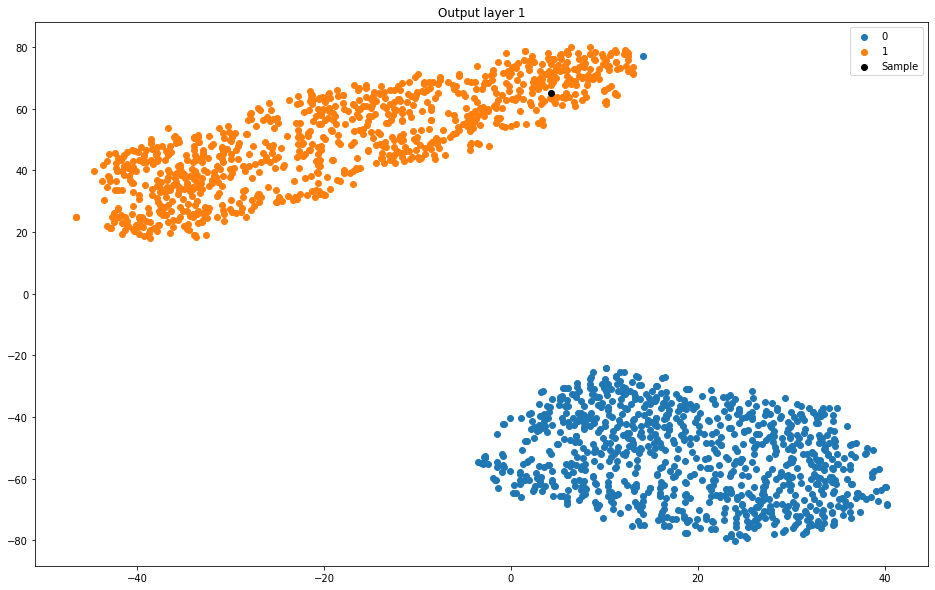

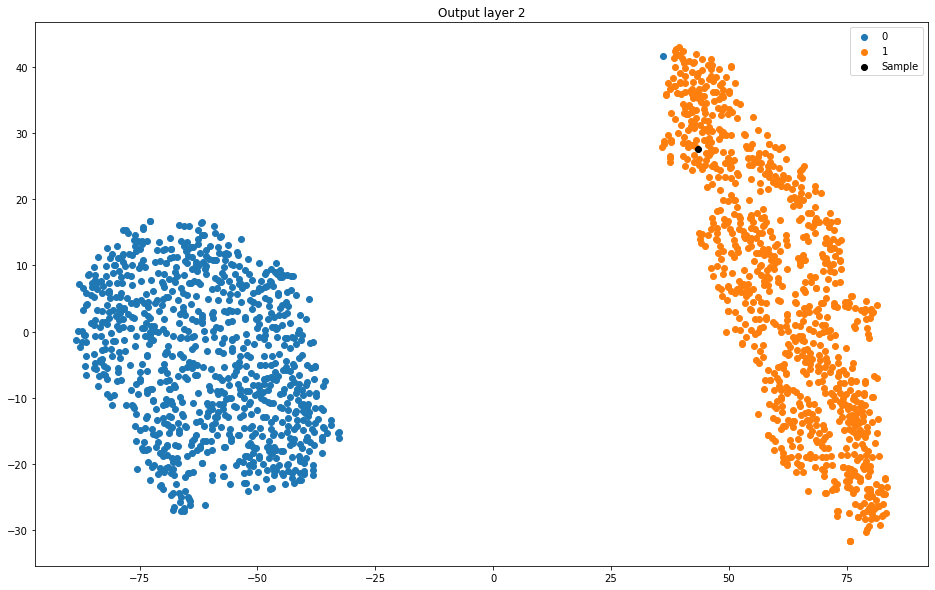

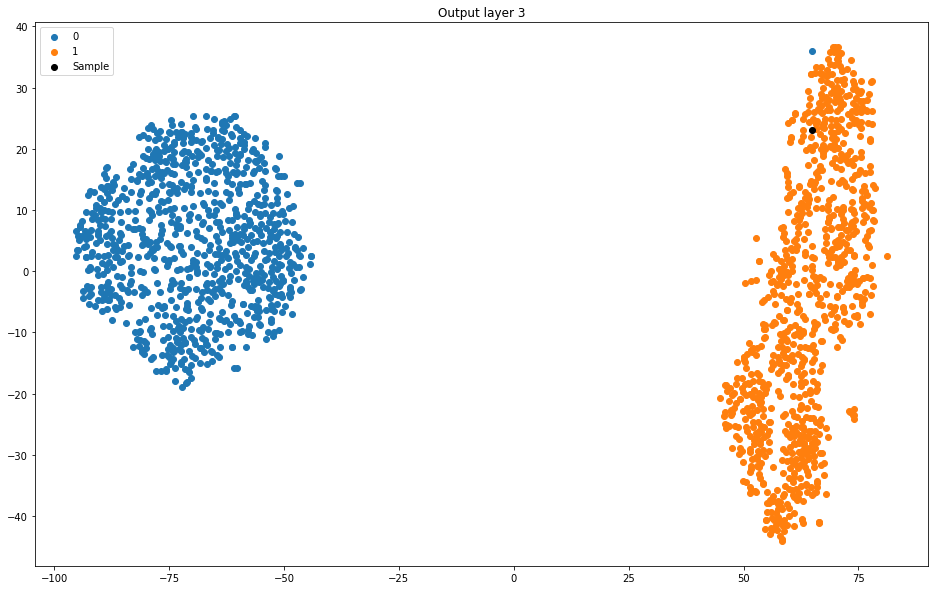

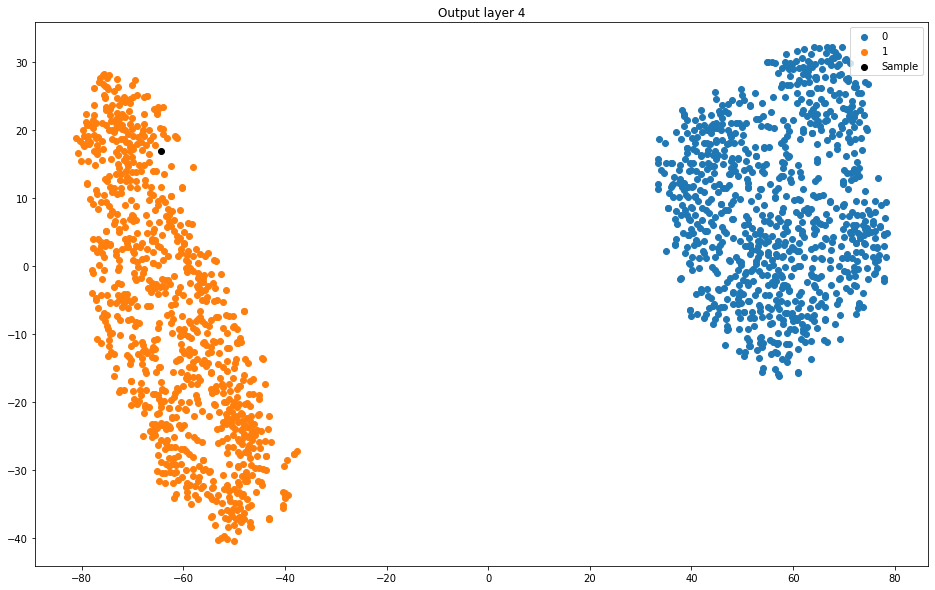

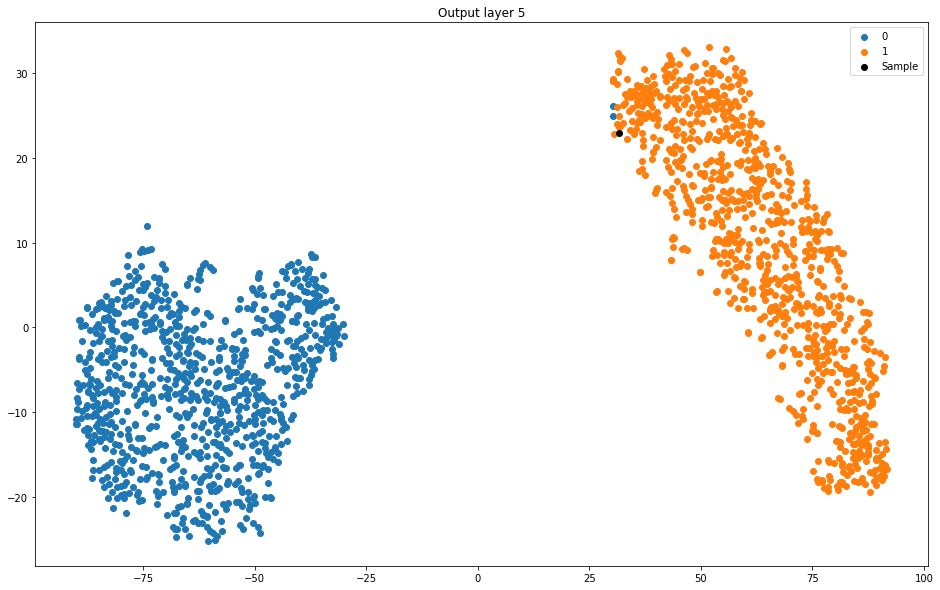

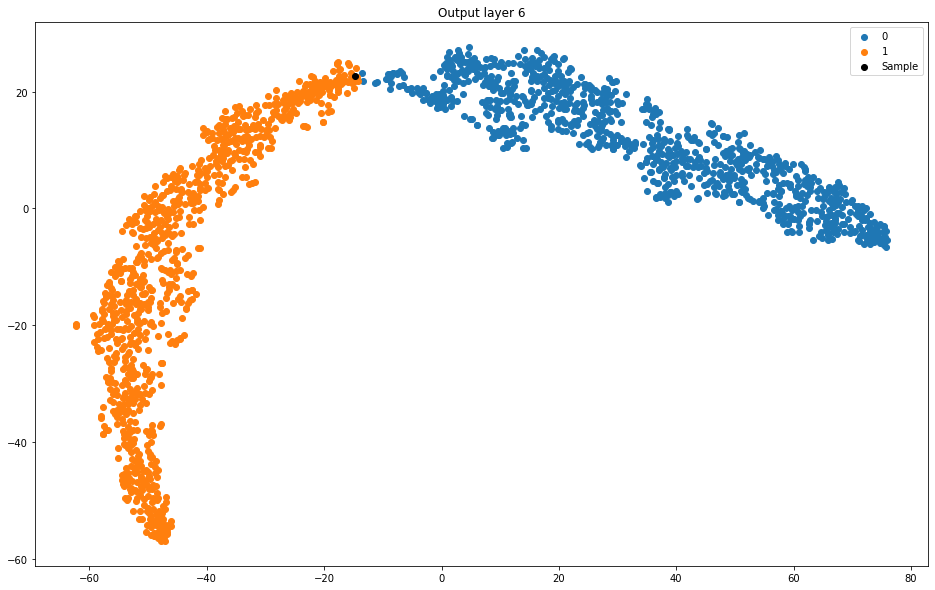

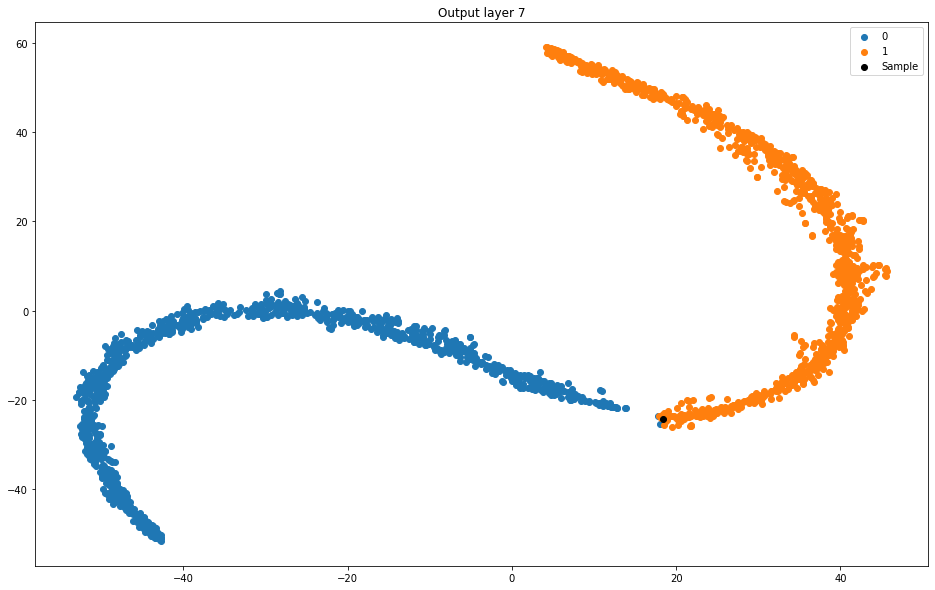

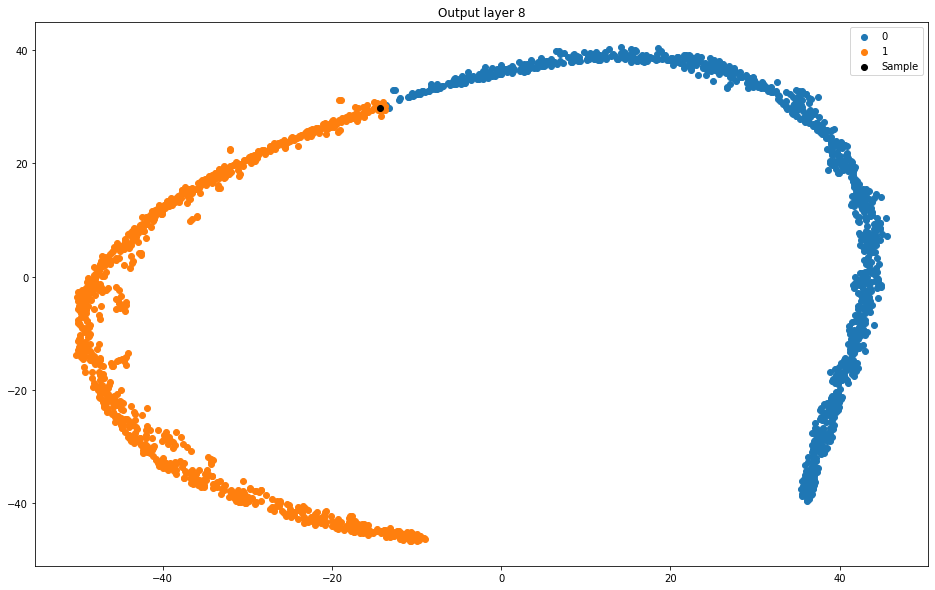

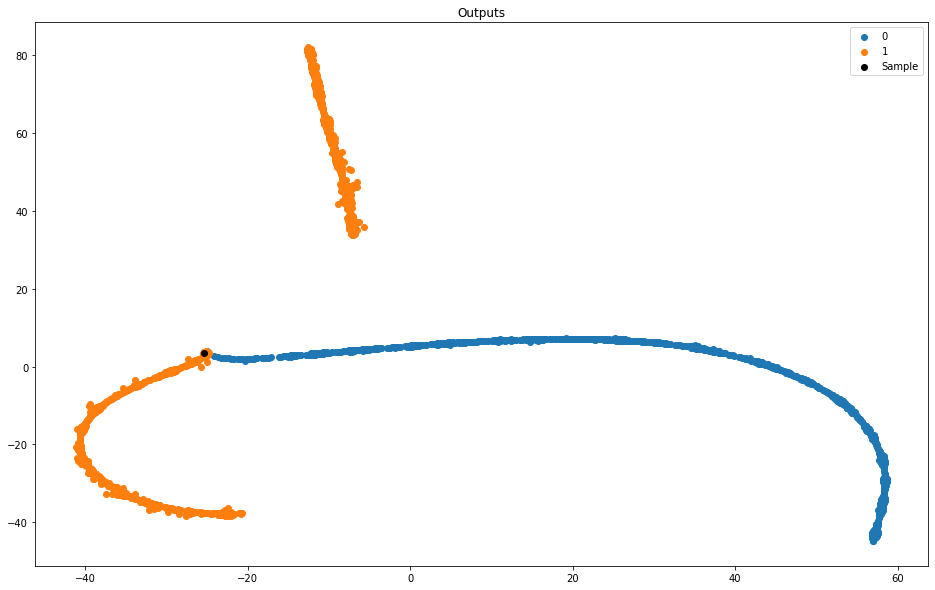

In [7]:
clusters.plotClusters(data, labels, sample)